In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.ensemble import GradientBoostingClassifier
import copy


/Users/ClumsyJace/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ClumsyJace/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('thesis_final_data3.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 20 columns):
Unnamed: 0                                 49352 non-null int64
bathrooms                                  49352 non-null float64
bedrooms                                   49352 non-null float64
interest_level                             49352 non-null object
latitude                                   49352 non-null float64
longitude                                  49352 non-null float64
price                                      49352 non-null float64
address                                    49339 non-null object
Zip                                        49339 non-null float64
State                                      48963 non-null object
County                                     48963 non-null object
City                                       48963 non-null object
Median Household Income                    48963 non-null float64
Number of Income Household              

In [4]:
data_next =  data.drop(['Unnamed: 0','address','State','County','City','distance'],axis=1)

In [5]:
data_next.groupby(['bedrooms']).size().reset_index()

,bedrooms,0
0,0.0,9475
1,1.0,15752
2,2.0,14623
3,3.0,7276
4,4.0,1929
5,5.0,247
6,6.0,46
7,7.0,2
8,8.0,2


In [6]:
list(data_next)

['bathrooms',
 'bedrooms',
 'interest_level',
 'latitude',
 'longitude',
 'price',
 'Zip',
 'Median Household Income',
 'Number of Income Household ',
 'Number Population by Race',
 'Number of Family Households in Poverty ',
 'Number of individual unemployed',
 'mindistance',
 'storecount_mediandistance']

In [7]:
Final_Project_Data = data_next[[
     'bathrooms',
     'bedrooms',
     'latitude',
     'longitude',
     'price',
     'Zip',
     'Median Household Income',
     'Number of Income Household ',
     'Number Population by Race',
     'Number of Family Households in Poverty ',
     'Number of individual unemployed',
     'mindistance',
     'storecount_mediandistance',
     'interest_level'   
]]

In [8]:
sorted(data_next['bathrooms'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [9]:
Final_Project_Data.describe()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,49339.000000,48963.000000,48963.000000,48963.000000,48963.000000,48963.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,10190.361377,91003.467884,22018.205747,45741.077222,8687.341973,27769.459265,2.124403,3.137583
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,669.985340,31937.362824,9733.195504,22769.525175,5040.065737,12241.363181,84.983427,4.405772
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,83.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,10014.000000,74065.000000,15455.000000,27415.000000,4482.000000,19135.000000,0.190000,0.000000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,10023.000000,100200.000000,23146.000000,46883.000000,7958.000000,30318.000000,0.280000,1.000000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,10040.000000,111478.000000,28918.000000,60586.000000,11826.000000,36392.000000,0.370000,5.000000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,90011.000000,250001.000000,43456.000000,112709.000000,24350.000000,57642.000000,5385.720000,29.000000


In [10]:
len(Final_Project_Data)

49352

In [11]:
Final_Project_Data.head()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
0,1.5,3.0,40.7145,-73.9425,3000.0,11211.0,54406.0,37381.0,97772.0,18948.0,52303.0,2.24,0,medium
1,1.0,2.0,40.7947,-73.9667,5465.0,10025.0,74065.0,43456.0,96068.0,19089.0,54390.0,0.37,0,low
2,1.0,1.0,40.7388,-74.0018,2850.0,10011.0,109818.0,29762.0,52349.0,9004.0,36403.0,0.13,7,high
3,1.0,1.0,40.7539,-73.9677,3275.0,10022.0,126378.0,17892.0,30607.0,5998.0,19783.0,0.30,0,low
4,1.0,4.0,40.8241,-73.9493,3350.0,10031.0,39774.0,21191.0,59244.0,10655.0,34229.0,0.56,0,low


In [12]:
Final_Project_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 14 columns):
bathrooms                                  49352 non-null float64
bedrooms                                   49352 non-null float64
latitude                                   49352 non-null float64
longitude                                  49352 non-null float64
price                                      49352 non-null float64
Zip                                        49339 non-null float64
Median Household Income                    48963 non-null float64
Number of Income Household                 48963 non-null float64
Number Population by Race                  48963 non-null float64
Number of Family Households in Poverty     48963 non-null float64
Number of individual unemployed            48963 non-null float64
mindistance                                49352 non-null float64
storecount_mediandistance                  49352 non-null int64
interest_level                     

In [13]:
(Final_Project_Data.isnull().sum()/len(Final_Project_Data))*100

bathrooms                                  0.000000
bedrooms                                   0.000000
latitude                                   0.000000
longitude                                  0.000000
price                                      0.000000
Zip                                        0.026341
Median Household Income                    0.788215
Number of Income Household                 0.788215
Number Population by Race                  0.788215
Number of Family Households in Poverty     0.788215
Number of individual unemployed            0.788215
mindistance                                0.000000
storecount_mediandistance                  0.000000
interest_level                             0.000000
dtype: float64

## Data B - Where missing records will be interpolate to the nearest. 

In [14]:
Final_Project_Data_B=Final_Project_Data.interpolate(method='nearest')

In [15]:
Final_Project_Data_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 14 columns):
bathrooms                                  49352 non-null float64
bedrooms                                   49352 non-null float64
latitude                                   49352 non-null float64
longitude                                  49352 non-null float64
price                                      49352 non-null float64
Zip                                        49351 non-null float64
Median Household Income                    49351 non-null float64
Number of Income Household                 49351 non-null float64
Number Population by Race                  49351 non-null float64
Number of Family Households in Poverty     49351 non-null float64
Number of individual unemployed            49351 non-null float64
mindistance                                49352 non-null float64
storecount_mediandistance                  49352 non-null int64
interest_level                     

In [16]:
Final_Project_Data_B = Final_Project_Data_B.dropna(how='any')
Final_Project_Data_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49351 entries, 0 to 49350
Data columns (total 14 columns):
bathrooms                                  49351 non-null float64
bedrooms                                   49351 non-null float64
latitude                                   49351 non-null float64
longitude                                  49351 non-null float64
price                                      49351 non-null float64
Zip                                        49351 non-null float64
Median Household Income                    49351 non-null float64
Number of Income Household                 49351 non-null float64
Number Population by Race                  49351 non-null float64
Number of Family Households in Poverty     49351 non-null float64
Number of individual unemployed            49351 non-null float64
mindistance                                49351 non-null float64
storecount_mediandistance                  49351 non-null int64
interest_level                     

In [17]:
Final_Project_Data_B.describe()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
count,49351.000000,49351.000000,49351.000000,49351.000000,4.935100e+04,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000
mean,1.212184,1.541630,40.741542,-73.955716,3.830207e+03,10190.354096,90995.790035,22018.643655,45737.844096,8686.415473,27769.659602,2.124433,3.137647
std,0.501424,1.115028,0.638542,1.177924,2.206709e+04,669.925224,31907.348703,9730.227745,22760.406198,5038.669332,12237.480448,84.984287,4.405794
min,0.000000,0.000000,0.000000,-118.271000,4.300000e+01,83.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991700,2.500000e+03,10014.000000,74065.000000,15455.000000,27415.000000,4482.000000,19135.000000,0.190000,0.000000
50%,1.000000,1.000000,40.751800,-73.977900,3.150000e+03,10023.000000,100200.000000,23146.000000,46883.000000,7958.000000,30318.000000,0.280000,1.000000
75%,1.000000,2.000000,40.774300,-73.954800,4.100000e+03,10040.000000,111478.000000,28918.000000,60586.000000,11826.000000,36392.000000,0.370000,5.000000
max,10.000000,8.000000,44.883500,0.000000,4.490000e+06,90011.000000,250001.000000,43456.000000,112709.000000,24350.000000,57642.000000,5385.720000,29.000000


#### ****END of Data B. Number of none null values = 49,351

## Preprocessing and Modelling of Data B

#### Scaling for feature engineering

In [18]:
Final_Project_Data_B.head()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
0,1.5,3.0,40.7145,-73.9425,3000.0,11211.0,54406.0,37381.0,97772.0,18948.0,52303.0,2.24,0,medium
1,1.0,2.0,40.7947,-73.9667,5465.0,10025.0,74065.0,43456.0,96068.0,19089.0,54390.0,0.37,0,low
2,1.0,1.0,40.7388,-74.0018,2850.0,10011.0,109818.0,29762.0,52349.0,9004.0,36403.0,0.13,7,high
3,1.0,1.0,40.7539,-73.9677,3275.0,10022.0,126378.0,17892.0,30607.0,5998.0,19783.0,0.30,0,low
4,1.0,4.0,40.8241,-73.9493,3350.0,10031.0,39774.0,21191.0,59244.0,10655.0,34229.0,0.56,0,low


In [19]:
meandist = Final_Project_Data_B.groupby('interest_level')['mindistance'].mean()
meandist

interest_level
high      1.131334
low       2.518640
medium    1.260412
Name: mindistance, dtype: float64

In [20]:
medist = Final_Project_Data_B.groupby('interest_level')['mindistance'].median()
medist

interest_level
high      0.29
low       0.27
medium    0.28
Name: mindistance, dtype: float64

In [45]:
target = Final_Project_Data_B.groupby(['interest_level']).size().reset_index()
target = pd.DataFrame(target)
target.columns = ['interest_level', 'count']
target

,interest_level,count
0,high,3839
1,low,34283
2,medium,11229


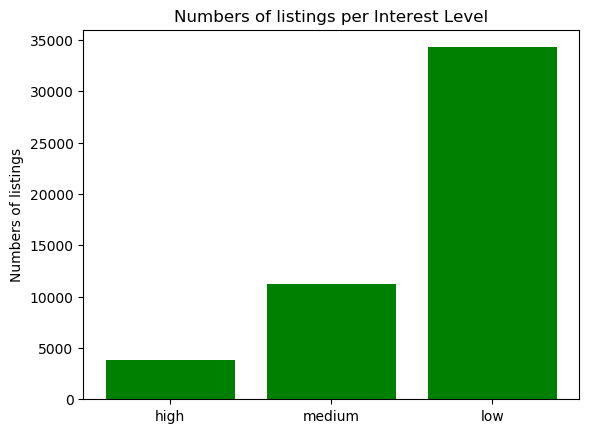

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('high', 'medium', 'low')
y_pos = np.arange(len(objects))
performance = [3839,11229,34283]
 
plt.bar(y_pos, performance, align='center',facecolor='g')
plt.xticks(y_pos, objects)
plt.ylabel('Numbers of listings')
plt.title('Numbers of listings per Interest Level')
plt.show()

In [39]:
len(set(Final_Project_Data_B['interest_level']))

3

In [32]:

Final_Project_Data_B.describe()


,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
count,49351.000000,49351.000000,49351.000000,49351.000000,4.935100e+04,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000
mean,1.212184,1.541630,40.741542,-73.955716,3.830207e+03,10190.354096,90995.790035,22018.643655,45737.844096,8686.415473,27769.659602,2.124433,3.137647
std,0.501424,1.115028,0.638542,1.177924,2.206709e+04,669.925224,31907.348703,9730.227745,22760.406198,5038.669332,12237.480448,84.984287,4.405794
min,0.000000,0.000000,0.000000,-118.271000,4.300000e+01,83.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991700,2.500000e+03,10014.000000,74065.000000,15455.000000,27415.000000,4482.000000,19135.000000,0.190000,0.000000
50%,1.000000,1.000000,40.751800,-73.977900,3.150000e+03,10023.000000,100200.000000,23146.000000,46883.000000,7958.000000,30318.000000,0.280000,1.000000
75%,1.000000,2.000000,40.774300,-73.954800,4.100000e+03,10040.000000,111478.000000,28918.000000,60586.000000,11826.000000,36392.000000,0.370000,5.000000
max,10.000000,8.000000,44.883500,0.000000,4.490000e+06,90011.000000,250001.000000,43456.000000,112709.000000,24350.000000,57642.000000,5385.720000,29.000000


In [88]:
Final_Project_Data_B.corr()

,bathrooms,bedrooms,latitude,longitude,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
bathrooms,1.000000,0.533452,-0.009655,0.010394,0.069661,0.013483,0.000738,-0.004481,-0.005285,-0.002851,0.011634,0.003638,-0.013185
bedrooms,0.533452,1.000000,-0.004747,0.006891,0.051789,-0.019626,0.000494,0.009638,0.006412,0.005251,0.005347,-0.053987,0.030216
latitude,-0.009655,-0.004747,1.000000,-0.966808,-0.000707,0.001002,0.008880,0.005514,0.003645,0.007991,-0.986192,0.006083,0.001216
longitude,0.010394,0.006891,-0.966808,1.000000,-0.000087,-0.004600,-0.003814,-0.000516,0.001719,-0.003109,0.939100,-0.017165,-0.002279
price,0.069661,0.051789,-0.000707,-0.000087,1.000000,0.008541,-0.008784,-0.009326,-0.009538,-0.009257,0.000351,0.008910,-0.005528
Median Household Income,0.013483,-0.019626,0.001002,-0.004600,0.008541,1.000000,-0.256857,-0.473680,-0.458030,-0.349945,-0.003376,0.050765,0.010045
Number of Income Household,0.000738,0.000494,0.008880,-0.003814,-0.008784,-0.256857,1.000000,0.925508,0.853783,0.973455,-0.006536,-0.044759,-0.004339
Number Population by Race,-0.004481,0.009638,0.005514,-0.000516,-0.009326,-0.473680,0.925508,1.000000,0.958859,0.966004,-0.003512,-0.062903,-0.007766
Number of Family Households in Poverty,-0.005285,0.006412,0.003645,0.001719,-0.009538,-0.458030,0.853783,0.958859,1.000000,0.887700,-0.001721,-0.065844,-0.006958
Number of individual unemployed,-0.002851,0.005251,0.007991,-0.003109,-0.009257,-0.349945,0.973455,0.966004,0.887700,1.000000,-0.005839,-0.053174,-0.005819


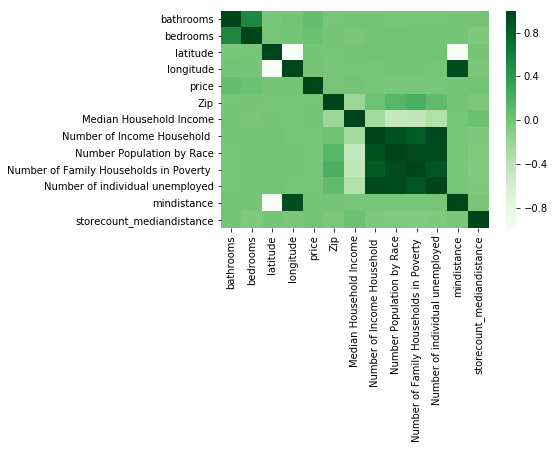

In [29]:
import seaborn as sns
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
corr = Final_Project_Data_B.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
           cmap=plt.cm.Greens)
plt.show()

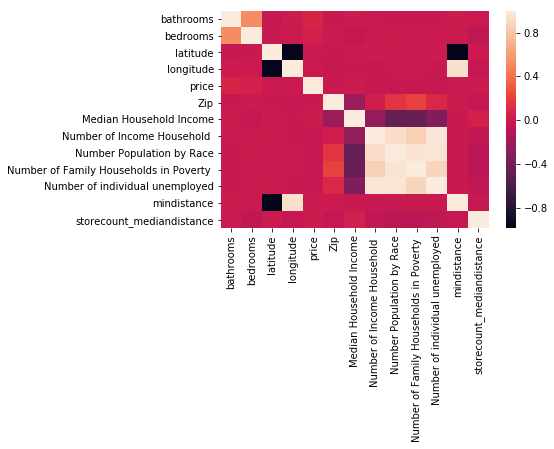

In [20]:
import seaborn as sns
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
corr = Final_Project_Data_B.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [75]:
# # Using encoder instead
# Final_Project_Data_B = Final_Project_Data_B.replace({'interest_level' : { 'medium' : 2, 'low' : 1, 'high' : 3 }})

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Final_Project_Data_B['interest_level'] = le.fit_transform(Final_Project_Data_B['interest_level'])

In [54]:
Final_Project_Data_B = Final_Project_Data_B.drop(['Zip'],axis=1)

In [89]:
Final_Project_Data_B.describe()

,bathrooms,bedrooms,latitude,longitude,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
count,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000
mean,0.121218,0.192704,40.741542,-73.955716,0.000843,0.363984,0.506688,0.405805,0.356732,0.481761,0.000394,0.108195,1.149744
std,0.050142,0.139378,0.638542,1.177924,0.004915,0.127628,0.223910,0.201940,0.206927,0.212301,0.015780,0.151924,0.531889
min,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.125000,40.728300,-73.991700,0.000547,0.296262,0.355647,0.243237,0.184066,0.331963,0.000035,0.000000,1.000000
50%,0.100000,0.125000,40.751800,-73.977900,0.000692,0.400801,0.532631,0.415965,0.326817,0.525971,0.000052,0.034483,1.000000
75%,0.100000,0.250000,40.774300,-73.954800,0.000904,0.445912,0.665455,0.537544,0.485667,0.631345,0.000069,0.172414,1.000000
max,1.000000,1.000000,44.883500,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [56]:
np.var(Final_Project_Data_B)

bathrooms                                  2.514207e-01
bedrooms                                   1.243262e+00
latitude                                   4.077271e-01
longitude                                  1.387476e+00
price                                      4.869465e+08
Median Household Income                    1.018058e+09
Number of Income Household                 9.467541e+07
Number Population by Race                  5.180256e+08
Number of Family Households in Poverty     2.538767e+07
Number of individual unemployed            1.497529e+08
mindistance                                7.222183e+03
storecount_mediandistance                  1.941063e+01
interest_level                             2.828999e-01
dtype: float64

In [57]:
Final_Project_Data_B.head(2)

,bathrooms,bedrooms,latitude,longitude,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
0,1.5,3.0,40.7145,-73.9425,3000.0,54406.0,37381.0,97772.0,18948.0,52303.0,2.24,0,2
1,1.0,2.0,40.7947,-73.9667,5465.0,74065.0,43456.0,96068.0,19089.0,54390.0,0.37,0,1


In [58]:
list(Final_Project_Data_B)

['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'Median Household Income',
 'Number of Income Household ',
 'Number Population by Race',
 'Number of Family Households in Poverty ',
 'Number of individual unemployed',
 'mindistance',
 'storecount_mediandistance',
 'interest_level']

In [59]:
scaler = MinMaxScaler()
Final_Project_Data_B[['bathrooms', 'bedrooms','price','Median Household Income','Number of Income Household ','Number Population by Race','Number of Family Households in Poverty ','Number of individual unemployed','mindistance','storecount_mediandistance']] = scaler.fit_transform(Final_Project_Data_B[['bathrooms', 'bedrooms','price','Median Household Income','Number of Income Household ','Number Population by Race','Number of Family Households in Poverty ','Number of individual unemployed','mindistance','storecount_mediandistance']])

In [60]:
Final_Project_Data_B.describe()

,bathrooms,bedrooms,latitude,longitude,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
count,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000
mean,0.121218,0.192704,40.741542,-73.955716,0.000843,0.363984,0.506688,0.405805,0.356732,0.481761,0.000394,0.108195,1.149744
std,0.050142,0.139378,0.638542,1.177924,0.004915,0.127628,0.223910,0.201940,0.206927,0.212301,0.015780,0.151924,0.531889
min,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.125000,40.728300,-73.991700,0.000547,0.296262,0.355647,0.243237,0.184066,0.331963,0.000035,0.000000,1.000000
50%,0.100000,0.125000,40.751800,-73.977900,0.000692,0.400801,0.532631,0.415965,0.326817,0.525971,0.000052,0.034483,1.000000
75%,0.100000,0.250000,40.774300,-73.954800,0.000904,0.445912,0.665455,0.537544,0.485667,0.631345,0.000069,0.172414,1.000000
max,1.000000,1.000000,44.883500,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [61]:
np.var(Final_Project_Data_B)

bathrooms                                  0.002514
bedrooms                                   0.019426
latitude                                   0.407727
longitude                                  1.387476
price                                      0.000024
Median Household Income                    0.016289
Number of Income Household                 0.050135
Number Population by Race                  0.040779
Number of Family Households in Poverty     0.042818
Number of individual unemployed            0.045071
mindistance                                0.000249
storecount_mediandistance                  0.023080
interest_level                             0.282900
dtype: float64

In [62]:
Final_Project_Data_B.head()

,bathrooms,bedrooms,latitude,longitude,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
0,0.15,0.375,40.7145,-73.9425,0.000659,0.217626,0.860203,0.867473,0.778152,0.907377,0.000416,0.000000,2
1,0.10,0.250,40.7947,-73.9667,0.001208,0.296262,1.000000,0.852354,0.783943,0.943583,0.000069,0.000000,1
2,0.10,0.125,40.7388,-74.0018,0.000625,0.439272,0.684877,0.464462,0.369774,0.631536,0.000024,0.241379,0
3,0.10,0.125,40.7539,-73.9677,0.000720,0.505512,0.411727,0.271558,0.246324,0.343205,0.000056,0.000000,1
4,0.10,0.500,40.8241,-73.9493,0.000737,0.159099,0.487643,0.525637,0.437577,0.593820,0.000104,0.000000,1


### Splitting Final_Project_Data_B to Train/Test

In [70]:
X = Final_Project_Data_B.drop(['interest_level','latitude', 'longitude'],axis=1)
y = Final_Project_Data_B['interest_level']

In [71]:
y.head()

0    2
1    1
2    0
3    1
4    1
Name: interest_level, dtype: int64

In [76]:
X.head()

,bathrooms,bedrooms,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
0,0.15,0.375,0.000659,0.217626,0.860203,0.867473,0.778152,0.907377,0.000416,0.000000
1,0.10,0.250,0.001208,0.296262,1.000000,0.852354,0.783943,0.943583,0.000069,0.000000
2,0.10,0.125,0.000625,0.439272,0.684877,0.464462,0.369774,0.631536,0.000024,0.241379
3,0.10,0.125,0.000720,0.505512,0.411727,0.271558,0.246324,0.343205,0.000056,0.000000
4,0.10,0.500,0.000737,0.159099,0.487643,0.525637,0.437577,0.593820,0.000104,0.000000


In [77]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, y_train= X, y


### Feature Importance

In [78]:
features = X_train.columns
features

Index(['bathrooms', 'bedrooms', 'price', 'Median Household Income',
       'Number of Income Household ', 'Number Population by Race',
       'Number of Family Households in Poverty ',
       'Number of individual unemployed', 'mindistance',
       'storecount_mediandistance'],
      dtype='object')

In [79]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train[features].values, y_train.values)
feature_importance = rnd_clf.feature_importances_

In [80]:
for name, score in zip(features, feature_importance):
        print(name, score)

bathrooms 0.0188494049891
bedrooms 0.0526049204016
price 0.335696778977
Median Household Income 0.0566565104479
Number of Income Household  0.0520286144223
Number Population by Race 0.0508678597239
Number of Family Households in Poverty  0.0531902904761
Number of individual unemployed 0.0513025030222
mindistance 0.254275614009
storecount_mediandistance 0.0745275035299


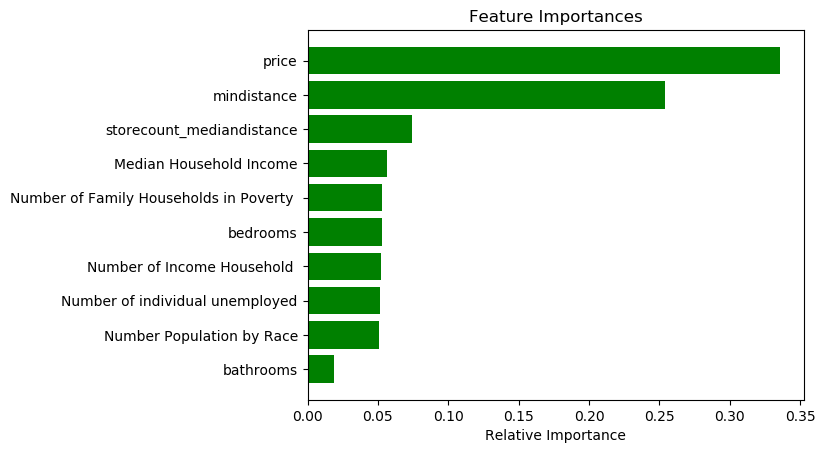

In [81]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Cross Validating - For all Features

In [82]:
X_train.head()

,bathrooms,bedrooms,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
0,0.15,0.375,0.000659,0.217626,0.860203,0.867473,0.778152,0.907377,0.000416,0.000000
1,0.10,0.250,0.001208,0.296262,1.000000,0.852354,0.783943,0.943583,0.000069,0.000000
2,0.10,0.125,0.000625,0.439272,0.684877,0.464462,0.369774,0.631536,0.000024,0.241379
3,0.10,0.125,0.000720,0.505512,0.411727,0.271558,0.246324,0.343205,0.000056,0.000000
4,0.10,0.500,0.000737,0.159099,0.487643,0.525637,0.437577,0.593820,0.000104,0.000000


In [83]:
y_train.head()

0    2
1    1
2    0
3    1
4    1
Name: interest_level, dtype: int64

In [103]:
X_train.head()

,bathrooms,bedrooms,price,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance
0,0.15,0.375,0.000659,0.217626,0.860203,0.867473,0.778152,0.907377,0.000416,0.000000
1,0.10,0.250,0.001208,0.296262,1.000000,0.852354,0.783943,0.943583,0.000069,0.000000
2,0.10,0.125,0.000625,0.439272,0.684877,0.464462,0.369774,0.631536,0.000024,0.241379
3,0.10,0.125,0.000720,0.505512,0.411727,0.271558,0.246324,0.343205,0.000056,0.000000
4,0.10,0.500,0.000737,0.159099,0.487643,0.525637,0.437577,0.593820,0.000104,0.000000


In [104]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores_naivebayes = np.mean(cross_val_score(clf,X_train,y_train,cv=5))
scores_naivebayes

0.69467691101455142

In [84]:
# Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
scores_rnd = np.mean(cross_val_score(rnd_clf,X_train,y_train,cv=5))
scores_rnd

0.67540658285746236

In [101]:
logreg = linear_model.LogisticRegression(C=1e5)
scores_log = np.mean(cross_val_score(logreg,X_train,y_train,cv=5))
scores_log

0.69814004818592079

In [102]:
svm = SVC()
scores_svm = np.mean(cross_val_score(svm,X_train,y_train,cv=5))
scores_svm

0.69820053053574715

In [103]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)
scores_ada = np.mean(cross_val_score(ada,X_train,y_train,cv=5))
scores_ada

0.70633634166110237

In [104]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb = ensemble.GradientBoostingClassifier(**params)

scores_gb = np.mean(cross_val_score(gb,X_train,y_train,cv=5))
scores_gb

0.71368529683116733

In [105]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5, 'max_leaf_nodes': 3,
          'learning_rate': 0.01, 'min_samples_leaf': 5, 'random_state': 3}

gb_max_leaf3 = ensemble.GradientBoostingClassifier(**params)

scores_gb_max_leaf3 = np.mean(cross_val_score(gb_max_leaf3,X_train,y_train,cv=5))
scores_gb_max_leaf3

0.70700152856931253

In [107]:
performance = [scores_rnd,scores_log,scores_svm,scores_ada,scores_gb,scores_gb_max_leaf3]
performance

[0.69968237778027897,
 0.69814004818592079,
 0.69820053053574715,
 0.70633634166110237,
 0.71368529683116733,
 0.70700152856931253]

In [33]:
results = [0.69968237778027897,
 0.69814004818592079,
 0.69820053053574715,
 0.70633634166110237,
 0.71368529683116733,
 0.70700152856931253]

In [35]:
performance = ['RandomForest','LogisticRegression'
               ,'SupportVectorMachine','AdaBoostingClassifier',
               'GradientBoostingClassifier'
               ,'GradientBoostingClassifiermax3']

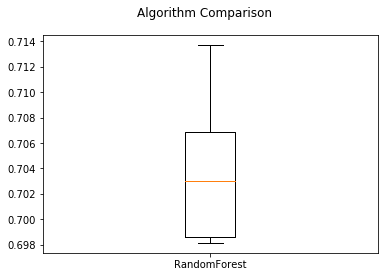

In [38]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(performance)
plt.show()

### Ploting mean of accuracy score 

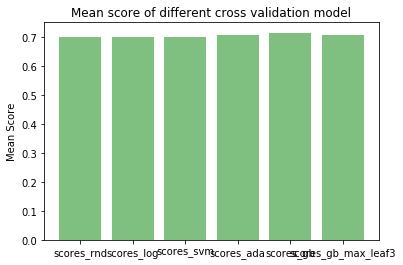

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('scores_rnd', 'scores_log', 'scores_svm', 'scores_ada', 'scores_gb','scores_gb_max_leaf3')
y_pos = np.arange(len(objects))
performance = [scores_rnd,scores_log,scores_svm,scores_ada,scores_gb,scores_gb_max_leaf3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,color='green')
plt.xticks(y_pos, objects)
plt.ylabel('Mean Score')
plt.title('Mean score of different cross validation model')
 
plt.show()

## Grid Search for all features

In [126]:
y_train = y_train.values

In [129]:
rf = RandomForestClassifier(max_features='sqrt')  

param_grid = {  
           "n_estimators" : [10, 100, 1000],  
           "max_depth" : [5, 100, 500],  
           "min_samples_leaf" : [1, 20, 40]}  

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)  
CV_rf.fit(X_train, y_train)  


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [5, 100, 500], 'min_samples_leaf': [1, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [130]:
CV_rf.grid_scores_, CV_rf.best_params_, CV_rf.best_score_

([mean: 0.70035, std: 0.00085, params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10},
  mean: 0.70138, std: 0.00072, params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100},
  mean: 0.70168, std: 0.00030, params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000},
  mean: 0.70104, std: 0.00030, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 10},
  mean: 0.70129, std: 0.00044, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 100},
  mean: 0.70144, std: 0.00053, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 1000},
  mean: 0.70080, std: 0.00106, params: {'max_depth': 5, 'min_samples_leaf': 40, 'n_estimators': 10},
  mean: 0.70059, std: 0.00085, params: {'max_depth': 5, 'min_samples_leaf': 40, 'n_estimators': 100},
  mean: 0.70122, std: 0.00018, params: {'max_depth': 5, 'min_samples_leaf': 40, 'n_estimators': 1000},
  mean: 0.68326, std: 0.00280, params: {'max_depth': 100, 'min_samples_leaf': 1, 'n_e

In [140]:
param_test3 = {'min_samples_split':list(range(10,100,1000)), 'min_samples_leaf':list(range(30,71,10))}

In [141]:
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3,scoring= 'accuracy', n_jobs=4,iid=False, cv=3)

In [142]:
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [10], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [139]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.71142, std: 0.00144, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.71166, std: 0.00210, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.71111, std: 0.00065, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.71081, std: 0.00081, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.71042, std: 0.00074, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.71012, std: 0.00004, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.71105, std: 0.00135, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.71108, std: 0.00126, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.71024, std: 0.00057, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.71057, std: 0.00090, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.71117, std: 0.00171, params: {'min_samples_leaf': 40, 'min_samples_spl

## <b> Cross Validating - For top 4 features </b>

In [266]:
X_train_importance = X_train[['price','latitude','longitude','mindistance']]
y_train_importance = copy.deepcopy(y_train)

In [105]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores_naivebayes_4 = np.mean(cross_val_score(clf,X_train_importance,y_train_importance,cv=5))
scores_naivebayes_4

0.69467691101455142

In [267]:
# Random Forest
rnd_clf_importance = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
scores_rnd_importance = np.mean(cross_val_score(rnd_clf_importance,X_train_importance,y_train_importance,cv=5))
scores_rnd_importance

0.67778590632490077

In [268]:
logreg_importance = linear_model.LogisticRegression(C=1e5)
scores_log_importance = np.mean(cross_val_score(logreg_importance,X_train_importance,y_train_importance,cv=5))
scores_log_importance

0.69820053053574715

In [269]:
svm_importance = SVC()
scores_svm_importance = np.mean(cross_val_score(svm_importance,X_train_importance,y_train_importance,cv=5))
scores_svm_importance

0.69820053053574715

In [270]:
ada_importance = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)
scores_ada_importance = np.mean(cross_val_score(ada_importance,X_train_importance,y_train_importance,cv=5))
scores_ada_importance

0.7004687444033042

In [271]:
params_importance = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb_importance = ensemble.GradientBoostingClassifier(**params)

scores_gb_importance = np.mean(cross_val_score(gb_importance,X_train_importance,y_train_importance,cv=5))
scores_gb_importance

0.70440045832136566

In [272]:
params_importance = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5, 'max_leaf_nodes': 3,
          'learning_rate': 0.01, 'min_samples_leaf': 5, 'random_state': 3}

gb_max_leaf3_importance = ensemble.GradientBoostingClassifier(**params)

scores_gb_max_leaf3_importance = np.mean(cross_val_score(gb_max_leaf3_importance,X_train_importance,y_train_importance,cv=5))
scores_gb_max_leaf3_importance

0.70440045832136566

In [273]:
performance_importance = [scores_rnd_importance,scores_log_importance,scores_svm_importance,scores_ada_importance,scores_gb_importance,scores_gb_max_leaf3_importance]
performance_importance

[0.67778590632490077,
 0.69820053053574715,
 0.69820053053574715,
 0.7004687444033042,
 0.70440045832136566,
 0.70440045832136566]

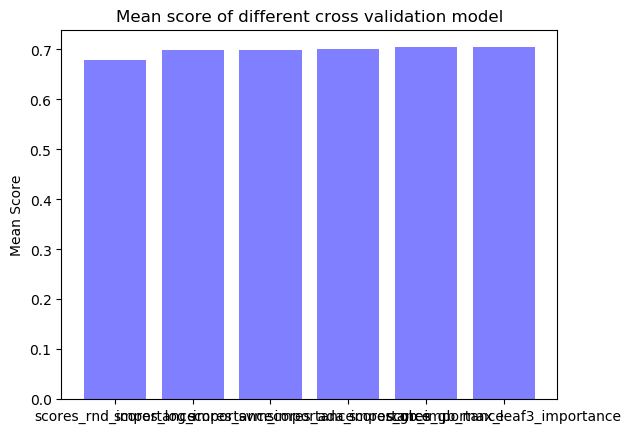

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('scores_rnd_importance', 'scores_log_importance', 'scores_svm_importance', 'scores_ada_importance', 'scores_gb_importance','scores_gb_max_leaf3_importance')
y_pos = np.arange(len(objects))
performance_importance = [scores_rnd_importance,scores_log_importance,scores_svm_importance,scores_ada_importance,scores_gb_importance,scores_gb_max_leaf3_importance]
 
plt.bar(y_pos, performance_importance, align='center', alpha=0.5,color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('Mean Score')
plt.title('Mean score of different cross validation model')
 
plt.show()

## <b> Cross Validating - For top 2 features </b>

In [85]:
X_train_importance = X_train[['price','mindistance']]
y_train_importance = copy.deepcopy(y_train)

In [87]:
# Random Forest
rnd_clf_importance = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
scores_rnd_importance = np.mean(cross_val_score(rnd_clf_importance,X_train_importance,y_train_importance,cv=5))
scores_rnd_importance

0.66071603104707466

In [86]:
logreg_importance = linear_model.LogisticRegression(C=1e5)
scores_log_importance = np.mean(cross_val_score(logreg_importance,X_train_importance,y_train_importance,cv=5))
scores_log_importance

0.69467691101455142

In [ ]:
svm_importance = SVC()
scores_svm_importance = np.mean(cross_val_score(svm_importance,X_train_importance,y_train_importance,cv=5))
scores_svm_importance

In [ ]:
ada_importance = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)
scores_ada_importance = np.mean(cross_val_score(ada_importance,X_train_importance,y_train_importance,cv=5))
scores_ada_importance

In [ ]:
params_importance = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb_importance = ensemble.GradientBoostingClassifier(**params)

scores_gb_importance = np.mean(cross_val_score(gb_importance,X_train_importance,y_train_importance,cv=5))
scores_gb_importance

In [275]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb = ensemble.GradientBoostingClassifier(**params)

scores_gb = np.mean(cross_val_score(gb,X_train,y_train,cv=10))
scores_gb

0.7131415234518419

In [276]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb = ensemble.GradientBoostingClassifier(**params)

scores_gb = np.mean(cross_val_score(gb,X_train,y_train,cv=3))
scores_gb

0.71153791009393696

In [277]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb = ensemble.GradientBoostingClassifier(**params)

scores_gb = np.mean(cross_val_score(gb,X_train,y_train,cv=5))
scores_gb

0.71335260962059543

In [ ]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}

In [ ]:
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=3)

In [ ]:
gsearch3.fit(X_train,y_train)

In [ ]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [119]:
a = np.array[y_train]

TypeError: 'builtin_function_or_method' object is not subscriptable

## Data A - Where missing zip will be deleted. remaining missing columns wil be imputed based on the mean of the zipcode

In [56]:
len(Final_Project_Data_A)

49352

In [57]:
Final_Project_Data_A = Final_Project_Data.dropna(subset=['Zip'])

In [58]:
len(Final_Project_Data_A)

49339

In [59]:
Final_Project_Data_A.head()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level
0,1.5,3.0,40.7145,-73.9425,3000.0,11211.0,54406.0,37381.0,97772.0,18948.0,52303.0,2.24,0,medium
1,1.0,2.0,40.7947,-73.9667,5465.0,10025.0,74065.0,43456.0,96068.0,19089.0,54390.0,0.37,0,low
2,1.0,1.0,40.7388,-74.0018,2850.0,10011.0,109818.0,29762.0,52349.0,9004.0,36403.0,0.13,7,high
3,1.0,1.0,40.7539,-73.9677,3275.0,10022.0,126378.0,17892.0,30607.0,5998.0,19783.0,0.30,0,low
4,1.0,4.0,40.8241,-73.9493,3350.0,10031.0,39774.0,21191.0,59244.0,10655.0,34229.0,0.56,0,low


In [44]:
list(Final_Project_Data_A)

['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'Zip',
 'Median Household Income',
 'Number of Income Household ',
 'Number Population by Race',
 'Number of Family Households in Poverty ',
 'Number of individual unemployed',
 'mindistance',
 'storecount_mediandistance',
 'interest_level']

In [74]:
means = Final_Project_Data_A.groupby('Zip')['Median Household Income'].mean()
nulls = Final_Project_Data_A['Median Household Income'].isnull()
fills = Final_Project_Data_A.Zip[nulls].map(means)
# Final_Project_Data_A.loc[nulls, 'Price'] = fills

In [76]:
Final_Project_Data_A.loc[nulls, 'Median Household Income'] = fills

/Users/ClumsyJace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
Final_Project_Data_A['storecount_mediandistance'] = final_data.apply(lambda row: storescount(row['distance']), axis=1)

In [ ]:
final_data['storecount_mediandistance'] = final_data.apply(lambda row: storescount(row['distance']), axis=1)

In [ ]:
means = df.groupby('Section').Price.mean()
nulls = df.Price.isnull()
fills = df.Section[nulls].map(means)
df.loc[nulls, 'Median Household Income'] = fills

In [69]:
Final_Project_Data_A["Median Household Income"] = Final_Project_Data_A["Median Household Income"].fillna(Final_Project_Data_A.groupby("Zip")["Median Household Income"].transform("mean"))

/Users/ClumsyJace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["Price"] = (df["Price"].fillna(df.groupby("Section")["Price"].transform("mean"))

In [65]:
Final_Project_Data_A["Median Household Income"] = Final_Project_Data_A["Median Household Income"].fillna(Final_Project_Data_A.groupby("Zip")["Median Household Income"].transform("mean"))

/Users/ClumsyJace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
Final_Project_Data_A["Median Household Income"].isnull().sum()

376

In [101]:
Final_Project_Data_A.head()

,bathrooms,bedrooms,latitude,longitude,price,Zip,Median Household Income,Number of Income Household,Number Population by Race,Number of Family Households in Poverty,Number of individual unemployed,mindistance,storecount_mediandistance,interest_level,Price
0,1.5,3.0,40.7145,-73.9425,3000.0,11211.0,54406.0,37381.0,97772.0,18948.0,52303.0,2.24,0,medium,NaN
1,1.0,2.0,40.7947,-73.9667,5465.0,10025.0,74065.0,43456.0,96068.0,19089.0,54390.0,0.37,0,low,NaN
2,1.0,1.0,40.7388,-74.0018,2850.0,10011.0,109818.0,29762.0,52349.0,9004.0,36403.0,0.13,7,high,NaN
3,1.0,1.0,40.7539,-73.9677,3275.0,10022.0,126378.0,17892.0,30607.0,5998.0,19783.0,0.30,0,low,NaN
4,1.0,4.0,40.8241,-73.9493,3350.0,10031.0,39774.0,21191.0,59244.0,10655.0,34229.0,0.56,0,low,NaN


In [107]:
Final_Project_Data_A.columns

Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'Zip',
       'Median Household Income', 'Number of Income Household ',
       'Number Population by Race', 'Number of Family Households in Poverty ',
       'Number of individual unemployed', 'mindistance',
       'storecount_mediandistance', 'interest_level', 'Price'],
      dtype='object')

In [ ]:
df["c"].fillna(df.groupby("a")["c"].transform("mean"), inplace=True)

In [104]:
#grouping each zip to take mean then impute for missing value
abc_df = Final_Project_Data_A["Median Household Income"].fillna(Final_Project_Data_A.groupby("Zip").mean()["Median Household Income"], inplace=False)
# Final_Project_Data_A["Number of Income Household "].fillna(Final_Project_Data_A.groupby("Zip")["Number of Income Household "].transform("mean"), inplace=True)
# Final_Project_Data_A["Number Population by Race"].fillna(Final_Project_Data_A.groupby("Zip")["Number Population by Race"].transform("mean"), inplace=True)
# Final_Project_Data_A["Number of Family Households in Poverty "].fillna(Final_Project_Data_A.groupby("Zip")["Number of Family Households in Poverty "].transform("mean"), inplace=True)
# Final_Project_Data_A["Number of individual unemployed"].fillna(Final_Project_Data_A.groupby("Zip")["Number of individual unemployed"].transform("mean"), inplace=True)

In [111]:
abc_df.isnull().sum()

374

In [112]:
len(abc_df)

49339

KeyError: "None of [['Median Household Income']] are in the [index]"

In [105]:
print(8)

8


In [46]:
Final_Project_Data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 14 columns):
bathrooms                                  49352 non-null float64
bedrooms                                   49352 non-null float64
latitude                                   49352 non-null float64
longitude                                  49352 non-null float64
price                                      49352 non-null float64
Zip                                        49339 non-null float64
Median Household Income                    48963 non-null float64
Number of Income Household                 48963 non-null float64
Number Population by Race                  48963 non-null float64
Number of Family Households in Poverty     48963 non-null float64
Number of individual unemployed            48963 non-null float64
mindistance                                49352 non-null float64
storecount_mediandistance                  49352 non-null int64
interest_level                     

In [ ]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

In [ ]:
Final_Project_Data_A["postTestScore"].fillna(Final_Project_Data_A.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

In [24]:
import pandas as pd
import numpy as np

x=np.linspace(0,1,10)
y=np.sin(x)

y[[3,4,7]]=np.NaN

df=pd.DataFrame({'y':y}, index=x)

dfi=df.interpolate(method='nearest')
# dfn=df.fillna(method='nearest')

In [25]:
df

,y
0.000000,0.000000
0.111111,0.110883
0.222222,0.220398
0.333333,NaN
0.444444,NaN
0.555556,0.527415
0.666667,0.618370
0.777778,NaN
0.888889,0.776372
1.000000,0.841471


In [26]:
dfi

,y
0.000000,0.000000
0.111111,0.110883
0.222222,0.220398
0.333333,0.220398
0.444444,0.527415
0.555556,0.527415
0.666667,0.618370
0.777778,0.618370
0.888889,0.776372
1.000000,0.841471


In [113]:
import pandas as pd
data = [{'a': 5, 'b': 10, 'c': 20},{'a': 1, 'b': 2, 'c': 4},{'a': 3, 'b': 2},{'a': 1, 'b': 3, 'c': 33}]
df = pd.DataFrame(data)
# df = pd.DataFrame(data, index=['zero','first', 'second','third'])
print (df)

   a   b     c
0  5  10  20.0
1  1   2   4.0
2  3   2   NaN
3  1   3  33.0


In [114]:
df["c"].fillna(df.groupby("a")["c"].transform("mean"), inplace=True)
df

,a,b,c
0,5,10,20.0
1,1,2,4.0
2,3,2,NaN
3,1,3,33.0


In [100]:
dfi=df.interpolate(method='nearest')

In [36]:
dfi

,a,b,c
0,5,10,20.0
1,1,2,4.0
2,1,2,4.0
3,1,3,33.0
